In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs, make_circles
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

# SVM

In [2]:
# create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=2, cluster_std=1)

In [3]:
# fit the model
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

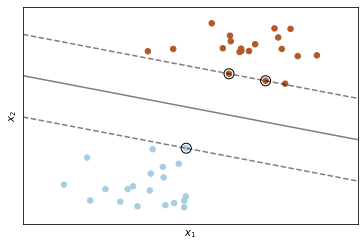

In [4]:
# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(clf, X, plot_method="contour", colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"], ax=ax)

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=100, linewidth=1, facecolors="none", edgecolors="k")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()

In [5]:
# create 40 non separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=2, cluster_std=2.3)

In [6]:
# fit the model 
clf = svm.LinearSVC(C=1000, loss="hinge", random_state=42, dual="auto")
clf.fit(X, y)
decision_function = clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X[support_vector_indices]

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, '$x_2$')

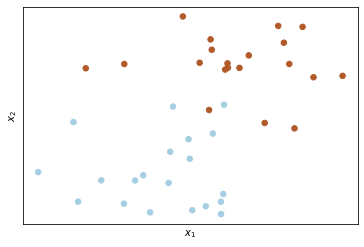

In [10]:
# plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

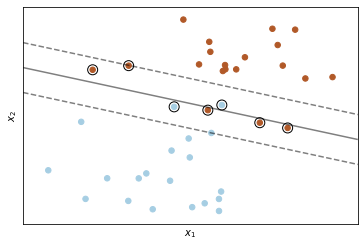

In [11]:
# plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(clf, X, plot_method="contour", colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"], ax=ax)

# plot support vectors
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="k")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()

# Kernel trick

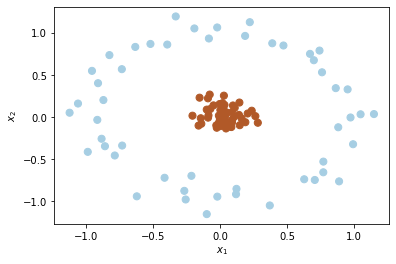

In [8]:
X, y = make_circles(100, factor=0.1, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

In [9]:
clf = svm.SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

In [10]:
def plot_decision_function(model):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=150, linewidth=1, color = 'k', facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

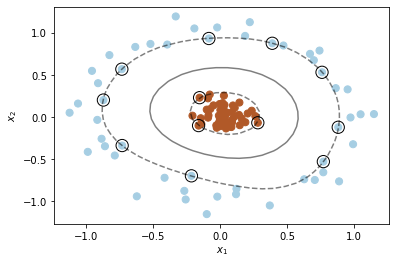

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_decision_function(clf)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

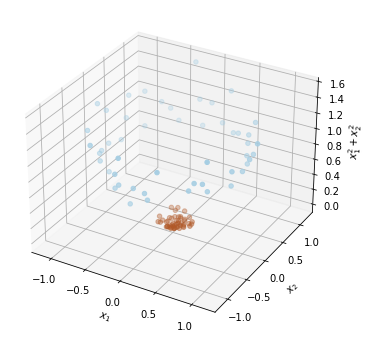

In [12]:
# Define the kernel function
def poly_kernel(x1, x2):
    return x1**2 + x2**2 

# Create the higher-dimensional representation of the data using kernel
def transform_to_higher_dim(X):
    n_samples = X.shape[0]
    transformed_X = np.zeros((n_samples, 3))
    for i in range(n_samples):
        transformed_X[i, 0] += X[i,0]
        transformed_X[i, 1] += X[i,1]
        transformed_X[i, 2] += poly_kernel(X[i,0], X[i,1])

    return transformed_X

# Transform the data to a higher dimension
X_higher_dim = transform_to_higher_dim(X)


# plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_higher_dim[:, 0], X_higher_dim[:, 1], X_higher_dim[:, 2], c=y, cmap=plt.cm.Paired)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$x_1^2+x_2^2$')
plt.show()

# Bias variance trade off

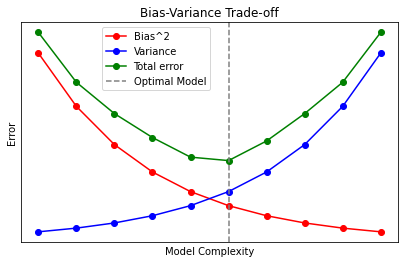

In [18]:
# Define the general trend lines for bias and variance
model_complexity = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
values = np.linspace(1,4,10)
variance = np.exp(values)
bias = variance[::-1]
b_v =[60.59815003314424,
 46.12128399815321,
 37.031624894526125,
 30.085536923187668,
 24.39191609514989,
 23.39191609514989,
 29.085536923187668,
 37.031624894526125,
 46.12128399815321,
 60.59815003314424]

# Plot lines for bias and variance
plt.plot(model_complexity, bias, marker='o', label='Bias^2', color='red')
plt.plot(model_complexity, variance, marker='o', label='Variance', color='blue')
plt.plot(model_complexity, b_v, marker='o', label='Total error', color='green')
plt.axvline(x=6, color='grey', linestyle='--', label='Optimal Model')

plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off')
plt.legend(loc='upper left',  bbox_to_anchor=(0.2, 1))
plt.grid(True)
plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.show()

# regularization

In [13]:
np.random.seed(0)
n_samples = 30
degrees = [3, 12]

X = np.random.rand(n_samples) * 2
y = np.sin(np.pi * X) + np.random.randn(n_samples) * 0.4

In [19]:
preds = list()
X_test = np.linspace(0, 2, 100)

for i in range(len(degrees)):
    # Fit PolynomialFeatures to your input data
    polynomial_features = PolynomialFeatures(degrees[i])
    polynomial_features.fit(X[:, np.newaxis], y)

    #Transform the original input data to obtain polynomial features
    X_poly = polynomial_features.transform(X[:, np.newaxis])

    # Train the model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # predict on the new data
    new_data_poly = polynomial_features.transform(X_test[:, np.newaxis])
    preds.append(model.predict(new_data_poly))

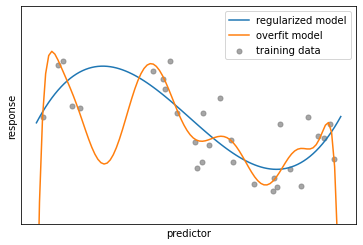

In [20]:
ax = plt.subplot()
plt.setp(ax, xticks=(), yticks=())
plt.scatter(X, y, s=25, label='training data', alpha=0.7, color = 'grey')
plt.plot(X_test, preds[0], label='regularized model')
plt.plot(X_test, preds[1], label='overfit model')
plt.ylim(-2,2)
plt.xlabel('predictor')
plt.ylabel('response')
plt.legend()
plt.show()